In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=True)

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [3]:
data = mnist['data']
target = mnist['target']

data.shape, target.shape, target.unique()

((70000, 784),
 (70000,),
 ['5', '0', '4', '1', '9', '2', '3', '6', '7', '8']
 Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9'])

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
data.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(data, target,
                                                 test_size=0.2,
                                                 random_state=0,
                                                 stratify=target)

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((56000, 784), (56000,), (14000, 784), (14000,))

In [8]:
# 로지스틱 회귀 먼저 시도
# 모든 데이터를 다할려고 하니까 커널이 터질려해서 포기
logModel = LogisticRegression(max_iter=2000, solver='sag', random_state=40)
logModel.fit(X_train[:1000],y_train[:1000])

LogisticRegression(max_iter=2000, random_state=40, solver='sag')

In [9]:
# 과적합난다.
logModel.score(X_train[:1000],y_train[:1000]), logModel.score(X_test[:250],y_test[:250])

(1.0, 0.856)

In [10]:
# SGD를 사용해보자
# 뭔가 속도가 훨씬 빠르다.
SGDModel = SGDClassifier(max_iter=2000, random_state=40)
SGDModel.fit(X_train[:1000],y_train[:1000])

SGDClassifier(max_iter=2000, random_state=40)

In [11]:
# 하지만 성능은 되려 떨어졌다.
# 과적합 문제도 여전히 발생한다.
SGDModel.score(X_train[:1000],y_train[:1000]), SGDModel.score(X_test[:250],y_test[:250])

(0.996, 0.836)

In [12]:
# 숫자마다 성능 지표가 크게 차이가 난다.
print(classification_report(y_test[:250], logModel.predict(X_test[:250])))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.96      0.96      0.96        27
           2       0.75      0.75      0.75        20
           3       0.75      0.83      0.79        29
           4       1.00      0.81      0.89        21
           5       0.81      0.79      0.80        28
           6       0.91      0.89      0.90        35
           7       0.86      0.86      0.86        14
           8       0.81      0.81      0.81        27
           9       0.75      0.88      0.81        24

    accuracy                           0.86       250
   macro avg       0.86      0.85      0.86       250
weighted avg       0.86      0.86      0.86       250


In [42]:
# 혼동행렬을 그려보니 뭔가 납득할 결과가 나온거 같긴 하다.
# 이건 사람이 봐도 이렇게 판단할 거 같긴 한데 글씨를 어떻게 휘갈겨 쓴거야 싯팔
print(confusion_matrix(y_test[:250], logModel.predict(X_test[:250])))

[[24  0  0  1  0  0  0  0  0  0]
 [ 0 26  0  0  0  1  0  0  0  0]
 [ 0  0 15  3  0  0  1  0  1  0]
 [ 0  0  0 24  0  1  1  0  2  1]
 [ 0  0  0  0 17  0  0  0  0  4]
 [ 0  0  0  3  0 22  1  0  1  1]
 [ 0  0  2  0  0  2 31  0  0  0]
 [ 0  0  1  0  0  0  0 12  0  1]
 [ 0  1  1  1  0  1  0  1 22  0]
 [ 0  0  1  0  0  0  0  1  1 21]]


In [13]:
# 이번엔 모델을 튜닝해보자.
# 손실 함수를 바꿔가면서 해보자.
for func in ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron']:
    SGDModel = SGDClassifier(max_iter=2000, random_state=40,
                             loss=func)
    SGDModel.fit(X_train[:1000],y_train[:1000])
    print(f'loss_function : {func}')
    print('train_score =', SGDModel.score(X_train[:1000],y_train[:1000]))
    print('test_score =', SGDModel.score(X_test[:250],y_test[:250]))
    print('\n')

loss_function : hinge
train_score = 0.996
test_score = 0.836

loss_function : log_loss
train_score = 0.993
test_score = 0.848

loss_function : modified_huber
train_score = 0.993
test_score = 0.848

loss_function : squared_hinge
train_score = 1.0
test_score = 0.808

loss_function : perceptron
train_score = 0.996
test_score = 0.836


log_loss와 modified_huber에서 test score가 가장 높았다. log_loss를 중심으로 튜닝을 해보자.

In [14]:
def make_model(change=5, alpha=0.0001):
    SGDModel = SGDClassifier(max_iter=2000, random_state=40,
                             loss='log_loss',
                             n_iter_no_change=change,
                             alpha=alpha)
    
    return SGDModel

In [15]:
# ㅋ
# 아니 언제 다돼
# train_dict = {}
# test_dict = {}
# for alpha in [0.1**(1/i) for i in range(1, 8)]:
#     train_list = []
#     test_list = []
#     for change in range(1, 2001):
#         SGDModel = make_model(change, alpha)
#         SGDModel.fit(X_train[:1000],y_train[:1000])
#         
#         train_list.append(SGDModel.score(X_train[:1000],y_train[:1000]))
#         test_list.append(SGDModel.score(X_test[:1000], y_test[:1000]))
#     train_dict[alpha] = train_list
#     test_dict[alpha] = test_list

이건 좀 뇌절인거 같다. 저거 돌리다가 집에 못간다.

In [16]:
train_dict = {}
test_dict = {}

In [17]:
train_list = []
test_list = []
# for change in range(5, 101):
#     SGDModel = make_model(change)
#     SGDModel.fit(X_train[:1000],y_train[:1000])
# 
#     train_list.append(SGDModel.score(X_train[:1000],y_train[:1000]))
#     test_list.append(SGDModel.score(X_test[:1000], y_test[:1000]))
# train_dict[0.0001] = train_list
# test_dict[0.0001] = test_list

In [18]:
trainScoreDF = pd.DataFrame(train_dict)
testScoreDF = pd.DataFrame(test_dict)

trainScoreDF.to_csv('train_score.csv')
testScoreDF.to_csv('test_score.csv')

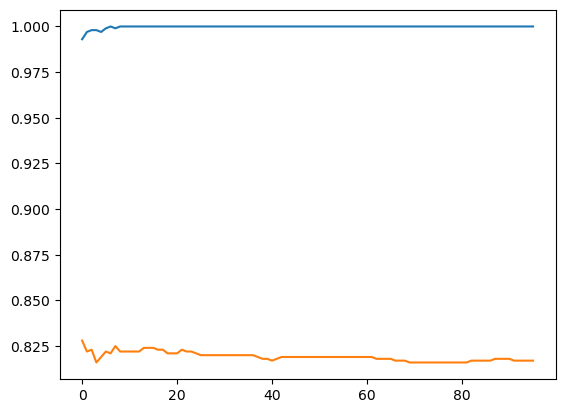

In [21]:
plt.plot(trainScoreDF)
plt.plot(testScoreDF)
plt.show()

In [19]:
# trainScoreDF = pd.read_csv('train_score.csv')
# testScoreDF = pd.read_csv('test_score.csv')

In [36]:
train_dict = {}
test_dict = {}
for alpha in [round(0.1**i, i+1) for i in range(1, 8)]:
    train_list = []
    test_list = []
    SGDModel = make_model(alpha=alpha)
    SGDModel.fit(X_train[:1000],y_train[:1000])

    train_list.append(SGDModel.score(X_train[:1000],y_train[:1000]))
    test_list.append(SGDModel.score(X_test[:1000], y_test[:1000]))
    train_dict[alpha] = train_list
    test_dict[alpha] = test_list

In [41]:
# 유의미한 차이를 모르겠다.
train_dict, test_dict

({0.1: [0.989],
  0.01: [0.992],
  0.001: [0.993],
  0.0001: [0.993],
  1e-05: [0.993],
  1e-06: [0.993],
  1e-07: [0.991]},
 {0.1: [0.817],
  0.01: [0.822],
  0.001: [0.827],
  0.0001: [0.828],
  1e-05: [0.831],
  1e-06: [0.828],
  1e-07: [0.825]})

In [39]:
trainScoreDF = pd.DataFrame(train_dict)
testScoreDF = pd.DataFrame(test_dict)

trainScoreDF.to_csv('train_score2.csv')
testScoreDF.to_csv('test_score2.csv')

In [43]:
# 더 이상 못참겠디. 모든 데이터를 학습시켜보자.
# 좀 걸리긴 하지만 확실히 그냥 로지스틱 회귀보다 훨씬 빠르다.
SGDModel = SGDClassifier(max_iter=2000, random_state=40)
SGDModel.fit(X_train, y_train)

SGDClassifier(max_iter=2000, random_state=40)

In [44]:
# 어... 데이터를 다 때려박으니 문제점이 해결된거 같기도 하다.
SGDModel.score(X_train, y_train), SGDModel.score(X_test, y_test)

(0.8803928571428571, 0.87)

In [45]:
# 숫자 3의 경이로운 재현율이 눈에 띄는데..?
print(classification_report(y_test, SGDModel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1381
           1       0.94      0.97      0.95      1575
           2       0.83      0.91      0.87      1398
           3       0.96      0.62      0.76      1428
           4       0.90      0.93      0.91      1365
           5       0.68      0.90      0.78      1263
           6       0.91      0.95      0.93      1375
           7       0.97      0.84      0.90      1459
           8       0.77      0.83      0.80      1365
           9       0.91      0.77      0.83      1391

    accuracy                           0.87     14000
   macro avg       0.88      0.87      0.87     14000
weighted avg       0.88      0.87      0.87     14000


In [46]:
# 모델이 3과 5를 많이 헷갈려 하는거 같다.
print(confusion_matrix(y_test, SGDModel.predict(X_test)))

[[1350    0    4    0    2    7    7    2    9    0]
 [   1 1535    4    1    0   10    6    2   14    2]
 [  21   15 1271    5   10   11   30    8   26    1]
 [  34    9   78  886    0  319    9    7   70   16]
 [   8    2   20    3 1268    7   16    1   14   26]
 [  12    6   10    5   12 1142   34    2   30   10]
 [  17    7   12    1    4   25 1303    0    5    1]
 [   6   10   68    5   23   27    0 1219   53   48]
 [  23   45   31   10    3   92   20    1 1136    4]
 [  18   11   29    3   86   39    1   19  115 1070]]


- 혹시 과적합이 의심된다면 데이터의 양이 충분했는지 생각해보자..
- 글씨좀 싯팔 똑바로 써라